## 質問など
+ ゼロからは難しい。　A. 当然で、心配無用です。  
この講義の趣旨は、自分で作図する際に、必要な情報を集められるだけの勘所を修得すること。[Matplotlib Examples](https://matplotlib.org/stable/gallery/index.html)
+ xticks, yticks と xlim, ylim の使い分けが分からない。   A. 説明します。
+ 縦軸ラベルの日本語の正立はできますか？　　A. 真面目に開発しないと無理っぽい。
+ マーカーにbcut_starを使いたい。   A. よりによって難しいのを選びました。 [こちらを参照](https://matplotlib.org/2.1.1/gallery/shapes_and_collections/marker_path.html)
+ グラフが保存できない。    グラフを作成したセルの末尾に、plt.savefig(...)を追記します。A. 説明します。
+ 画像の保存先をデスクトップにしたい。   A. もちろんできますよ。説明します。
+ 途中でセルが消えてしまった。。復活させるには？     A. Jupyter notebook メニューで、EditからUndo Delete Cellsを選択。
+ 日本語フォントの変更はできますか？    A. できます。説明します。
+ グラフの描画領域の色を指定したい。    A. 説明します。
+ 散布図のマーカーにラベルをつけたい。    A. 説明します。

In [1]:
# 数値演算、描画用ライブラリ読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# グラフをinline表示可能にする
%matplotlib inline
# 解像度を上げてinline表示する
%config InlineBackend.figure_format = 'retina'

## 課題２　解答例

In [2]:
url='https://www.ces-alpha.org/course/file_serve/5750314422501376/height.xlsx'
df_h = pd.read_excel(url)
df_h

age  boy_height  boy_std  girl_height  girl_std
0    6       117.5     4.99        116.7      4.97
1    7       123.5     5.29        122.6      5.28
2    8       129.1     5.54        128.5      5.69
3    9       134.5     5.79        134.8      6.44
4   10       140.1     6.35        141.5      6.84
5   11       146.6     7.29        148.0      6.52

In [3]:
# Pandasのデータ形式をnumpyのdataarray形式に変換
age = df_h['age'].to_numpy()
boy_h_mean = df_h['boy_height'].to_numpy()
boy_h_std = df_h['boy_std'].to_numpy()
girl_h_mean = df_h['girl_height'].to_numpy()
girl_h_std = df_h['girl_std'].to_numpy()

# 表示させてみる(print文でなくとも、１行にカンマ区切りで並べると表示される)
age, boy_h_mean, boy_h_std, girl_h_mean, girl_h_std

(array([ 6,  7,  8,  9, 10, 11], dtype=int64),
 array([117.5, 123.5, 129.1, 134.5, 140.1, 146.6]),
 array([4.99, 5.29, 5.54, 5.79, 6.35, 7.29]),
 array([116.7, 122.6, 128.5, 134.8, 141.5, 148. ]),
 array([4.97, 5.28, 5.69, 6.44, 6.84, 6.52]))

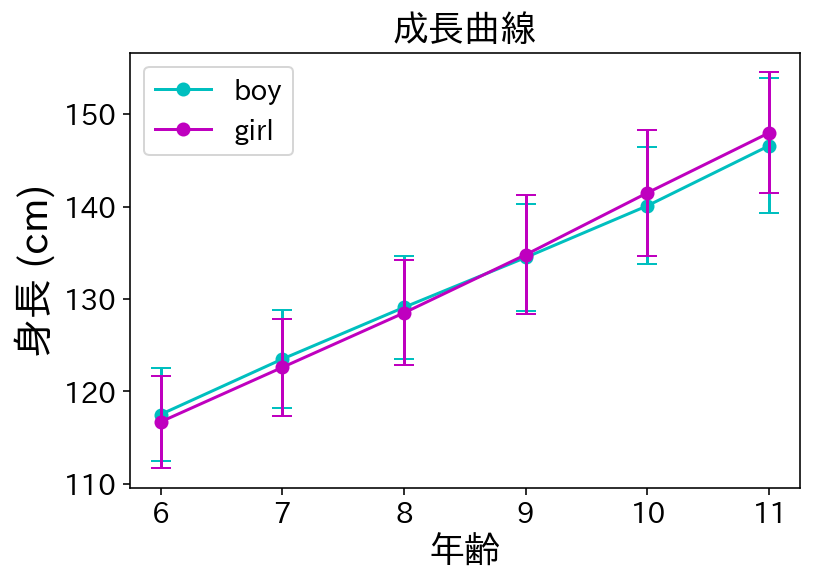

In [4]:
# 身長
plt.title('成長曲線',fontsize=18)
plt.xlabel("年齢", fontsize=18)
plt.ylabel("身長 (cm)", fontsize=20)
plt.tick_params(labelsize = 14) 

# marker
plt.plot(age, boy_h_mean, 'co-', label='boy')
plt.plot(age, girl_h_mean, 'mo-', label='girl')

# error bar
plt.errorbar(age, boy_h_mean, yerr=boy_h_std, c='c', ls='', capsize=5, zorder=2)
plt.errorbar(age, girl_h_mean, yerr=girl_h_std, c='m', ls='', capsize=5, zorder=2)
plt.legend(fontsize=14);

to_numpy() を使わず直接dataframeの列を与えてもよい

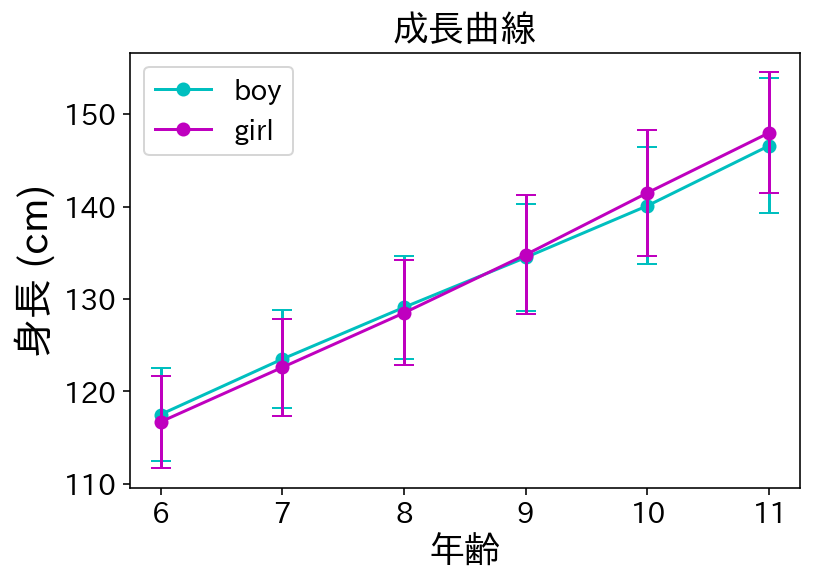

In [5]:
# 身長
plt.title('成長曲線',fontsize=18)
plt.xlabel("年齢", fontsize=18)
plt.ylabel("身長 (cm)", fontsize=20)
plt.tick_params(labelsize = 14) 

# marker
plt.plot(df_h['age'], df_h['boy_height'], 'co-', label='boy')
plt.plot(df_h['age'], df_h['girl_height'], 'mo-', label='girl')

# error bar
plt.errorbar(df_h['age'], df_h['boy_height'], yerr=df_h['boy_std'], c='c', ls='', capsize=5, zorder=2)
plt.errorbar(df_h['age'], df_h['girl_height'], yerr=df_h['girl_std'], c='m', ls='', capsize=5, zorder=2)
plt.legend(fontsize=14);

### xticks, yticks と xlim, ylim の使い分け

In [6]:
memori1 = range(0, 101, 10)
print(list(memori1))

memori2 = range(0, 101, 20)
print(list(memori2))

memori3 = [0,30,80,100]

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0, 20, 40, 60, 80, 100]


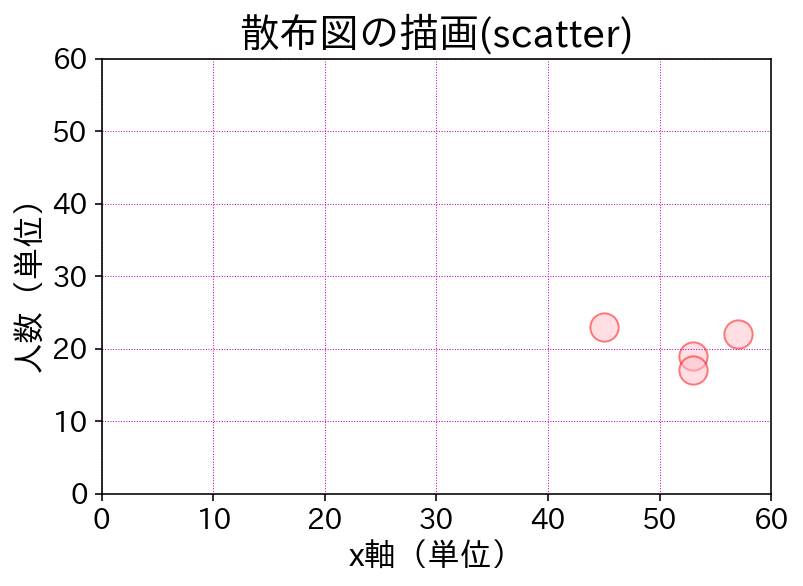

In [7]:
x = np.array([45, 94, 53, 88, 57, 79, 53, 69, 80, 66])
y = np.array([23, 30, 19, 27, 22, 15, 17, 17, 20, 25])

plt.title('散布図の描画(scatter)', fontsize=20)
plt.xlabel('x軸（単位）', fontsize=16)
plt.ylabel('人数（単位）', fontsize=16)
plt.scatter(x, y, s=200, c="pink", alpha=0.5, linewidths=1, edgecolors="red");

# 軸範囲の指定
plt.xlim(0,60)
plt.ylim(0,60)

# 任意目盛の設定（不定間隔も可）
#plt.xticks([0, 25, 50, 75, 100])
#plt.yticks(memori1)

# 目盛線のラベルサイズ
plt.tick_params(labelsize = 14) 

# グリッドの表示（色、線種、線幅を指定）
plt.grid(color='m', linestyle=':', linewidth=0.5)

#### グラフの保存について
+ 作成した図面を保存し、レポートやパワポに貼り付けて使う場合の手順を解説する。
+ 指定可能なファイル形式：emf, eps, jpeg, jpg, pdf, png, ps, raw, rgba, svg, svgz, tif, tiff  
+ 透明化処理したい場合は、`transparent=True` とする。
+ 画像のサイズは dpi で指定可能。

<u>グラフの保存用コマンド</u>  
グラフを作成したセルの末尾に、以下を追記する。  **セルを分けてはダメ！**
+ 作業中のnotebookのあるフォルダ 【=`cd .` で表示されるフォルダ】 に保存する場合    
`plt.savefig('mygraph.png', bbox_inches='tight', dpi=360, transparent=True);`  

+ Desktopに保存する場合（各自desktopへのパスは確認して書き換えること。）  
`plt.savefig(r'D:\Users\Desktop\mygraph.png', bbox_inches='tight', dpi=360, transparent=True);` (for Win）または  
`plt.savefig('D:/Users/Desktop/mygraph.png', bbox_inches='tight', dpi=360, transparent=True);` のようにする。

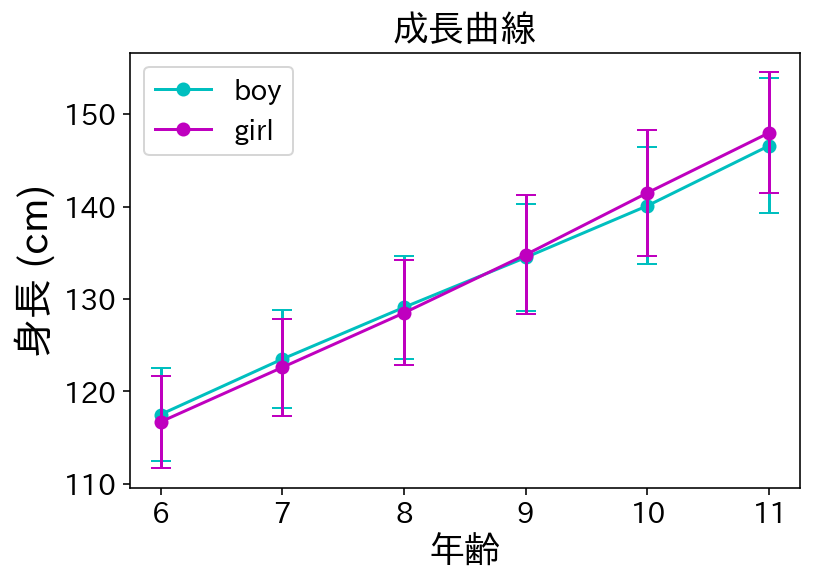

In [8]:
# 身長
plt.title('成長曲線',fontsize=18)
plt.xlabel("年齢", fontsize=18)
plt.ylabel("身長 (cm)", fontsize=20)
plt.tick_params(labelsize = 14) 

# marker
plt.plot(df_h['age'], df_h['boy_height'], 'co-', label='boy')
plt.plot(df_h['age'], df_h['girl_height'], 'mo-', label='girl')

# error bar
plt.errorbar(df_h['age'], df_h['boy_height'], yerr=df_h['boy_std'], c='c', ls='', capsize=5, zorder=2)
plt.errorbar(df_h['age'], df_h['girl_height'], yerr=df_h['girl_std'], c='m', ls='', capsize=5, zorder=2)
plt.legend(fontsize=14)

plt.savefig('D:/Users/Desktop/mygraph.png', bbox_inches='tight', dpi=360, transparent=False);

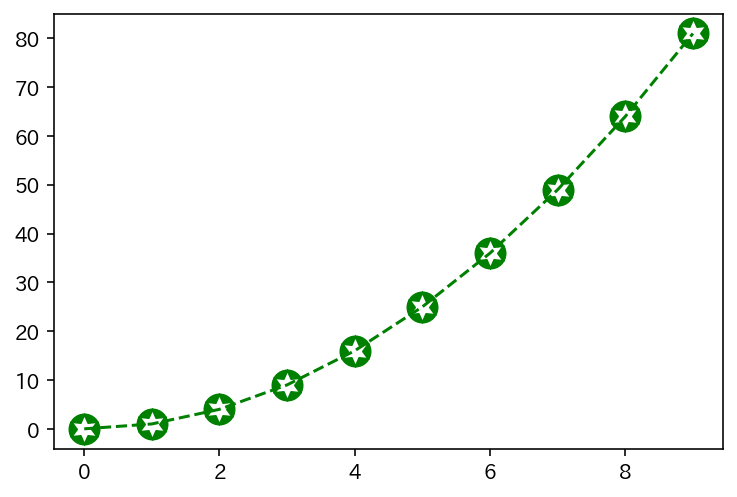

In [9]:
import matplotlib.path as mpath

star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.plot(np.arange(10)**2, '--g', marker=cut_star, markersize=15);

#### # 日本語フォントの指定
notebook全体で指定する場合は、
`plt.rcParams['font.family'] = 'Meiryo'`　などを一番上のセルに書けばよい。

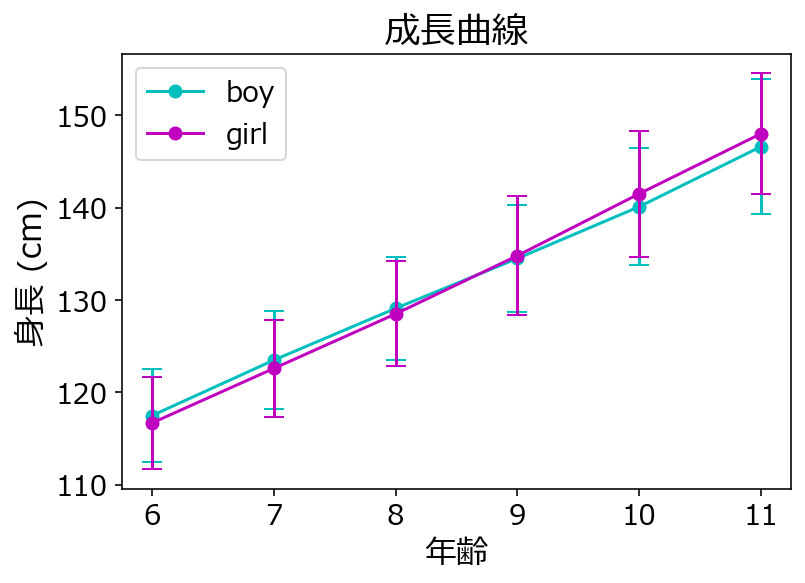

In [10]:
# 単一のグラフでのフォント指定
with plt.rc_context({'font.family': 'Meiryo'}):
    # 身長
    plt.title('成長曲線',fontsize=18)
    plt.xlabel("年齢", fontsize=16)
    plt.ylabel("身長 (cm)", fontsize=16)
    plt.tick_params(labelsize = 14)

    # marker
    plt.plot(age, boy_h_mean, 'co-', label='boy')
    plt.plot(age, girl_h_mean, 'mo-', label='girl')

    # error bar
    plt.errorbar(age, boy_h_mean, yerr=boy_h_std, c='c', ls='', capsize=5, zorder=2)
    plt.errorbar(age, girl_h_mean, yerr=girl_h_std, c='m', ls='', capsize=5, zorder=2)
    plt.legend(fontsize=14);

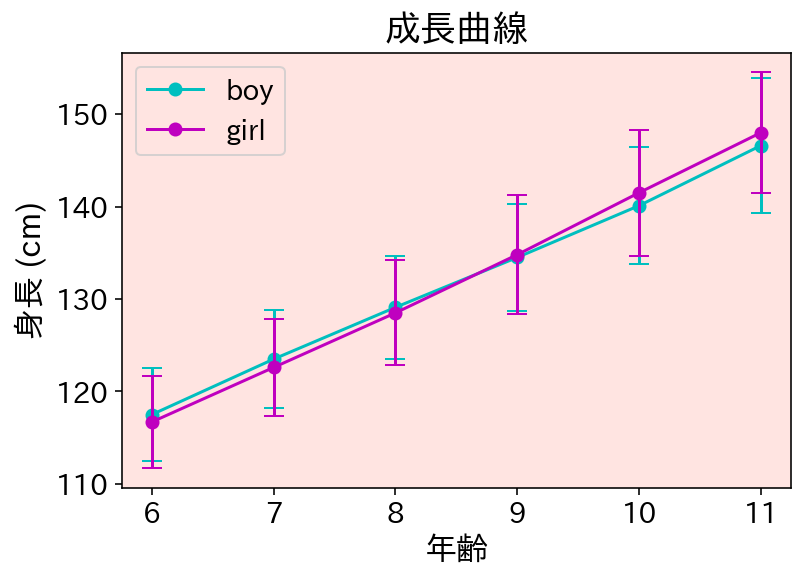

In [11]:
# 描画領域の色指定
with plt.rc_context({'axes.facecolor': 'mistyrose'}):
    # 身長
    plt.title('成長曲線',fontsize=18)
    plt.xlabel("年齢", fontsize=16)
    plt.ylabel("身長 (cm)", fontsize=16)
    plt.tick_params(labelsize = 14)

    # marker
    plt.plot(age, boy_h_mean, 'co-', label='boy')
    plt.plot(age, girl_h_mean, 'mo-', label='girl')

    # error bar
    plt.errorbar(age, boy_h_mean, yerr=boy_h_std, c='c', ls='', capsize=5, zorder=2)
    plt.errorbar(age, girl_h_mean, yerr=girl_h_std, c='m', ls='', capsize=5, zorder=2)
    plt.legend(fontsize=14);

#### 枠色等の変更

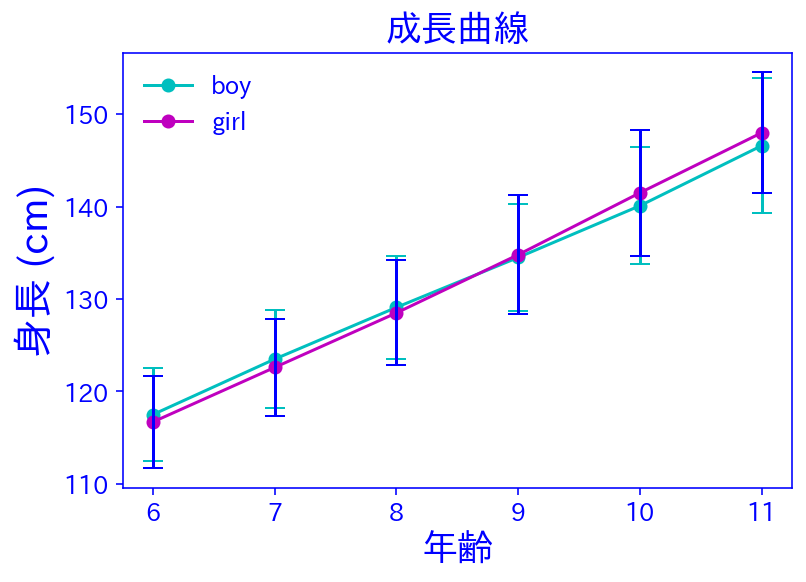

In [12]:
# 身長
plt.title('成長曲線',fontsize=18, color='blue')
plt.xlabel("年齢", fontsize=18, color='blue')
plt.ylabel("身長 (cm)", fontsize=20, color='blue')
plt.tick_params(labelsize = 14, color='blue') 

# bluearker
plt.plot(df_h['age'], df_h['boy_height'], 'co-', label='boy')
plt.plot(df_h['age'], df_h['girl_height'], 'mo-', label='girl')

# error bar
plt.errorbar(df_h['age'], df_h['boy_height'], yerr=df_h['boy_std'], c='c', ls='', capsize=5, zorder=2)
plt.errorbar(df_h['age'], df_h['girl_height'], yerr=df_h['girl_std'], c='blue', ls='', capsize=5, zorder=2)
plt.legend(fontsize=14)

plt.tick_params(labelsize=12, colors='blue')
# x, y軸個別指定も可
#plt.tick_parablues(axis='x', labelsize=12, colors='blue')
#plt.tick_parablues(axis='y', labelsize=12, colors='blue')

plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['right'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.legend(loc = 'upper left', fontsize=12, framealpha=0)

# 凡例の色変更
leg = plt.legend(loc = 'upper left', fontsize=12, framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'blue');

#### セル内一括置換
セル内にカーソルを置き、ESC、次いで F、で Find and Replace画面を出して操作

#### 散布図へのラベル付与

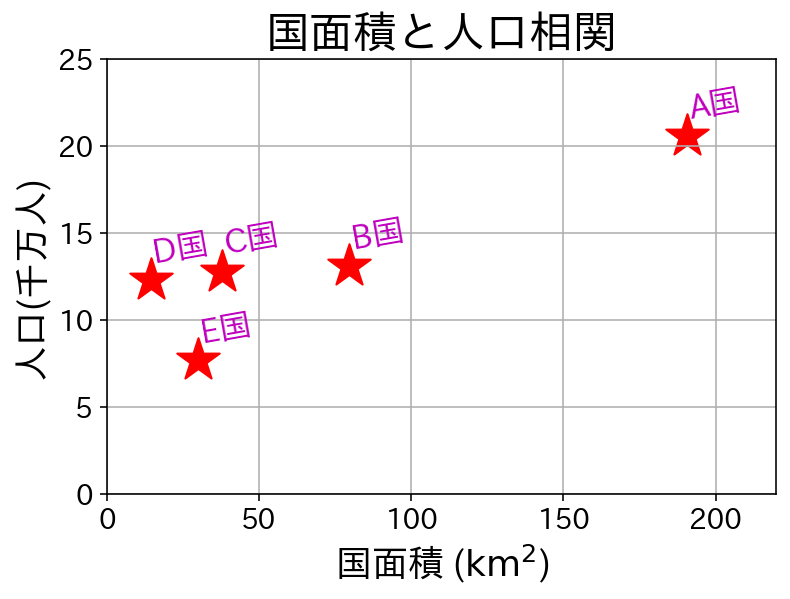

In [13]:
country = ['A国','B国', 'C国', 'D国', 'E国']
x = np.array([190.5,  79.6,  37.8,  14.4,  30.])
y = np.array([20.6, 13.1, 12.8, 12.3,  7.7])

#グラフサイズ
plt.figure(figsize = (6, 4))
# グラフタイトル
plt.title('国面積と人口相関', fontsize=22)

# TeX 表記：標準で斜体になるが、\mathrm で解除している
#plt.xlabel('国面積 (㎢)', fontsize=18)
#plt.xlabel('国面積 ($km^2$)', fontsize=18)
plt.xlabel('国面積 ($\mathrm{km^2}$)', fontsize=18)

plt.ylabel('人口(千万人)', fontsize=18)

plt.xlim(0, 220)
plt.ylim(0, 25)

#目盛の数字のサイズ
plt.tick_params(labelsize = 14)

#描画線の指定：zorder
plt.grid(zorder = 1)
plt.scatter(x, y, s=500, c='r', alpha=1, marker='*', zorder = 1);

# 各要素にDataFrameのインデックスの数字をラベルとして付ける
for i, txt in enumerate(country):
    s = plt.annotate(txt, (x[i], y[i]+1))  # +1 はoffset（見やすいよう適宜設定）
    s.set_fontsize(16)
    s.set_rotation(10)
    s.set_color('m')